# Giới thiệu

### Tổng quan

Chào mừng đã đến bài lab đầu tiên trong Khóa học VietAI. Lần này bạn sẽ học cách tương tác với hai thư viện được biết đến nhiều nhất - Numpy và TensorFlow. Bài toán chúng ta sẽ giải quyết trong buổi hôm nay là linear regression.

Trong lớp thí điểm này, các bài tập sẽ được áp dụng từ chương trình mở về khóa học sâu từ các trường đại học và nhiều nguồn mở khác.
 
### Mục tiêu học tập

* Hiểu thêm về cách hoạt động của Numpy và Tensorflow 
* Có thể viết một thuật toán đơn giản (và debug) với `Tensorflow` và `Numpy` qua ví dụ về hồi quy tuyến tính.
* Hiểu thêm về hồi quy tuyến tính.

# Giới thiệu

Bài toán lần này, chúng ta sẽ cùng nhau dự đoán giá nhà tại một thành phố Boston ở Mỹ với kích thước mẫu với 506 giá trị với 13 thuộc tính như sau

```
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)ˆ2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
```

Với thông tin này, ta sẽ cùng nhau tiến hành xây dựng một hàm giả thuyết theo mô hình hồi quy tuyến tính dựa trên `numpy` và `tensorflow` để đưa ra giá nhà dựa trên ít nhất là 2 thuộc tính.

### Tìm nghiệm xấp xỉ bằng `Numpy`

#### Nhập thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Đọc dữ liệu

In [2]:
from utils_function import load_Boston_housing_data

train_X, test_X, train_Y, test_Y = load_Boston_housing_data(feature_ind = [2,5])

Selected original features are ['INDUS' 'RM']


Vừa rồi, ta vừa mới tải tập dữ liệu xuống và chiết ra thành 4 tập. 

Trong đó, `train_X` và `train_Y` được dùng để xây dựng mô hình. Còn `test_X`, `test_Y` được giữ lại và chỉ được dùng để đánh giá độ tốt của mô hình ở phút cuối. 

Tỉ lệ được chia ra giữa các phần xây dựng và kiểm chứng là 1:4 Sau này, chúng ta sẽ học kỹ hơn về phần này nên phần đánh giá độ tốt của mô hình mình chỉ dừng lại ở mức là thực thi câu hàm đánh giá.

Để đơn giản, dữ liệu được lấy vào chỉ gồm 2 đặc tính

```
    - INDUS proportion of non-retail business acres per town
    - RM average number of rooms per dwelling
```

Tạm dịch

```
    - INDUS: tỷ lệ diện tích không dùng cho kinh doanh bán lẻ mỗi thị trấn
    - RM: số phòng trung bình mỗi căn hộ/ nhà
```

Bạn có thể lấy thêm các đặc tính khác qua việc thiết lập lại hàm `load_data` như sau

In [4]:
load_Boston_housing_data?

Signature: load_Boston_housing_data(test_ratio=0.2, feature_ind=None, random_state=0, print_info=False)
Docstring:
Load Boston Dataset from Sklearn.

Args:
  test_ratio(float)       : a proportion between train set and test set. Default = 0.2
  feature_ind(list(int))  : a list of index feature to be extracted from the original data set. No indication
                            means that all feature is chosen.
  random_state(int)       : a seed value for shuffling between values
  print_info(boolean)     : True if print the information of data set. Default: False
  
Returns:
  a tuple of four np.array data sets train_data, test_data, train_targets, test_targets
  
File:      f:\data science\vietai\week03\utils_function.py
Type:      function


Để hiểu thêm về tập dữ liệu ta có thể làm thêm một số minh họa như sau

#### Minh họa dữ liệu

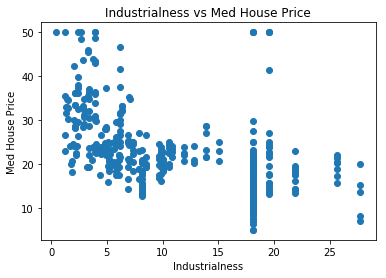

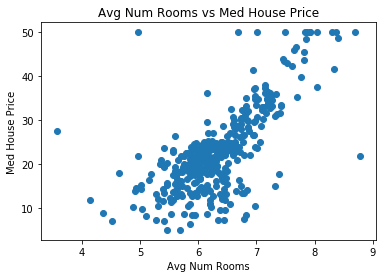

In [5]:
from utils_function import scatter_plot

scatter_plot(train_X[:, 0], train_Y,\
            title="Industrialness vs Med House Price",\
            x_label = "Industrialness",\
            y_label = "Med House Price")


scatter_plot(train_X[:, 1], train_Y,\
            title="Avg Num Rooms vs Med House Price",\
            x_label = "Avg Num Rooms",\
            y_label = "Med House Price")

#### Bài 1. Viết hàm cost function
Nhắc lại, từ công thức tính **mean squared error**, ta có:
$$\mathcal{E}(\hat{y}, y) = \frac{1}{2N} \sum_{i=1}^N (\hat{y}^{(i)}-y^{(i)})^2 $$
Khai triển, kết quả có là
$$\mathcal{E}(\hat{y}, y) = \frac{1}{2N} \sum_{i=1}^N (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b - y^{(i)})^2 $$

#### 1.1. Viết chương trình

In [3]:
def np_cost(w1, w2, b, X, y):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `y`, at weights `w1`, `w2` and `b`.
    '''
    
    costs = 0
    N = len(y)
    for i in range(len(y)):
        
        # TODO: complete below expression to calculate cost function
        y_hat = w1 * X[i, 0] + w2 * X[i, 1] + b
        costs += (y_hat - y[i]) * (y_hat - y[i])
        
    return costs / (2 * N)

#### 1.2 Chạy thử chương trình 

In [7]:
np_cost(3, 5, 20, train_X, train_Y)

2256.1627893564355

In [8]:
np_cost(3, 5, 0, train_X, train_Y)

1210.8142745049508

#### Bài 2. Vector hóa hàm cost

Ngoài ra, ta còn có thể viết lại công thức trên như sau:

$$\mathcal{E}(\hat{y}, y) = \frac{1}{2N} \| \bf{X} \bf{w} + b \mathbb{1} - \bf{y} \| ^2$$ 

#### 2.1 Viết chương trình

In [4]:
def np_cost_vectorized(w1, w2, b, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w1`, `w2` and `b`.
    '''
    
    #TODO: Complete the following expression
    N = len(y)
    w = np.array((w1, w2))
    #y_hat = np.dot(train_X, w.reshape(-1, 1)) + b
    y_hat = np.dot(train_X, w) + b
    
    return np.sum((y_hat - y)**2) / (2.0 * N)

#### 2.2 Chạy thử chương trình

In [12]:
np_cost_vectorized(3, 5, 20, train_X, train_Y)

2256.1627893564355

In [13]:
np_cost_vectorized(3, 5, 0, train_X, train_Y)

1210.8142745049504

### Tìm nghiệm chính xác

#### Bài 3. Tính nghiệm chính xác

Hiên thời, vecto của ta đang có dạng như sau:

In [14]:
print("Size of data X Matrix %s"  % str(train_X.shape))

Size of data X Matrix (404, 2)


In [15]:
print("Size of data Y array %s"  % str(train_Y.shape))

Size of data Y array (404,)


Để chuyển qua phép tính ma trận có dạng như sau $X *w + b$ ta cần bổ sung thêm một chiều cho hệ số tự do ở phần cuối của mỗi dòng trong ma trận. 

**Ví dụ** Lấy dòng đầu tiên của ma trận hiện thời, ta có: `array([ 6.2  ,  6.951 ])`   $\,\to\,$  `array([ 6.2  ,  6.951,  1.   ])`

#### 3. 1 Tái tạo vecto cho tập train

In [5]:
# TODO: Add one at the end of each row in train_X by np.concatenate
train_X_new = np.concatenate((train_X, np.ones(len(train_X)).reshape(-1, 1)), axis=1)
train_X_new

array([[ 6.2  ,  6.951,  1.   ],
       [10.81 ,  5.961,  1.   ],
       [ 4.93 ,  6.897,  1.   ],
       ...,
       [10.01 ,  6.021,  1.   ],
       [ 6.91 ,  6.03 ,  1.   ],
       [ 4.05 ,  5.572,  1.   ]])

In [17]:
train_X_new[0]

array([6.2  , 6.951, 1.   ])

#### 3.2 Viết chương trình tính nghiệm
 
$$\theta = \left(X^{\rm T}X\right)^{-1} \left(X^{\rm T}y \right) =  A * c $$

In [6]:
def np_solve_exactly(X, y):
    '''
    Solve linear regression exactly. (fully vectorized)
    
    Given `X` - NxD matrix of inputs
          `t` - target outputs
    Returns the optimal weights as a D-dimensional vector

    '''
    
    #TODO: Complete the below followed the above expressions
    A = np.dot(X.T, X)
    c = np.dot(X.T, y)
    
    return np.matmul(np.linalg.inv(A), c)

#### 3.3 Chạy thử chương trình

In [19]:
np_solve_exactly(train_X_new, train_Y)

array([ -0.37785864,   7.83254633, -22.54414787])

#### 3.4 Cách dùng `Numpy`

Một cách khác nhanh hơn mà `Numpy` hỗ trợ cho người dùng để tính nghiệm của phương trình tuyến tính là `np.linalg.lstsq`

```
Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular values of `a`.
    For the purposes of rank determination, singular values are treated
    as zero if they are smaller than `rcond` times the largest singular
    value of `a`.

Returns
-------
x : {(N,), (N, K)} ndarray
    Least-squares solution. If `b` is two-dimensional,
    the solutions are in the `K` columns of `x`.
residuals : {(), (1,), (K,)} ndarray
    Sums of residuals; squared Euclidean 2-norm for each column in
    ``b - a*x``.
    If the rank of `a` is < N or M <= N, this is an empty array.
    If `b` is 1-dimensional, this is a (1,) shape array.
    Otherwise the shape is (K,).
rank : int
    Rank of matrix `a`.
s : (min(M, N),) ndarray
    Singular values of `a`.
```

In [20]:
# TODO: Use the above function to calculate a solution of the linear equation
None

### Tìm nghiệm xấp xỉ bằng `Numpy`


#### Bài 4. Véc-tơ hóa hàm tính grad

Với $i = 1...m $ và $j = 1...n$ xét

$$ \frac{\partial \mathcal{E}}{\partial w_j} = \frac{1}{N}\sum_i x_j^{(i)}(\hat{y}^{(i)}-y^{(i)}) $$



#### 4.1 Viết chương trình

In [7]:
def np_gradfn(weights, X, y):
    '''
    Given `weights` - a current "Guess" of what our weights should be
          `X` - matrix of shape (N,D) of input features
          `t` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    N, D = X.shape
    y_hat = np.dot(X, weights)
    error = y_hat - y
    
    return np.matmul(np.transpose(X), error) / float(N)

#### Bài  5. Tính dựa trên Gradient Descent

Xấp xỉ giá trị $\theta$ như sau

$$ \hat{\theta} := \hat{\theta} - \alpha * \left( h_\theta(x^{(i)}) - y^{(i)} \right)x_j^{(i)}$$

#### 5.1 Viết chương trình

In [8]:
def np_solve_via_gradient_descent(X, y, print_every=5000,
                               niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (N,D) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    N, D = np.shape(X)
    # initialize all the weights to zeros
    w = np.zeros([D])
    for k in range(niter):
        
        #TODO: Complete the below followed the above expressions
        dw = np_gradfn(w, X, y)
        w = w - alpha * dw
        
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w

#### 5.2 Chạy thử chương trình

In [23]:
np_solve_via_gradient_descent(train_X_new, train_Y)

Weight after 0 iteration: [1.08841881 0.73504649 0.11305941]
Weight after 5000 iteration: [-0.52280011  5.12987932 -3.74261504]
Weight after 10000 iteration: [-0.49539334  5.64092276 -7.29776997]
Weight after 15000 iteration: [ -0.47316887   6.05533373 -10.18068575]
Weight after 20000 iteration: [ -0.4551468    6.39138431 -12.5184751 ]
Weight after 25000 iteration: [ -0.44053249   6.66389158 -14.41421522]
Weight after 30000 iteration: [ -0.42868158   6.88487083 -15.95149255]
Weight after 35000 iteration: [ -0.41907154   7.06406544 -17.19808831]
Weight after 40000 iteration: [ -0.41127866   7.20937639 -18.20896706]
Weight after 45000 iteration: [ -0.40495931   7.3272107  -19.02870019]
Weight after 50000 iteration: [ -0.39983489   7.42276389 -19.69343116]
Weight after 55000 iteration: [ -0.39567943   7.50024907 -20.2324691 ]
Weight after 60000 iteration: [ -0.39230972   7.56308268 -20.66958113]
Weight after 65000 iteration: [ -0.38957719   7.61403518 -21.02404027]
Weight after 70000 iter

array([ -0.38056077,   7.78216081, -22.19363296])

### Tìm nghiệm xấp xỉ bằng TensorFlow

#### Nhập thư viện

In [49]:
import tensorflow as tf
import numpy as np

#### Khai báo biến

In [154]:
learning_rate = 0.006
training_epochs = 55000
display_step = 100

#### Bài 6. Khai báo

In [155]:
n_samples = len(train_X_new)

X = tf.placeholder(dtype=tf.float64, name='x')
Y = tf.placeholder(dtype=tf.float64, name='y')

W = tf.Variable(initial_value=np.random.randn(train_X_new.shape[1], 1), name='weights')

train_Y = train_Y.reshape(-1, 1)

#### Bài 7. Xây dựng mô hình hồi quy tuyến tính

In [156]:
#TODO: implement a gradient descent function
pred = tf.matmul(X, W)
# pred = tf.add(tf.reshape(tf.maul(X, W), [-1,]), b)

#### Bài 8. Viết hàm cost

In [157]:
#TODO: implement a cost function

cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2*n_samples)

#### Bài 9. Viết hàm train

In [158]:
#TODO: implemement GD

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#### Bài 10. Chạy chương trình

In [159]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: train_X_new, Y: train_Y})
    
    print(sess.run(W))

[[ -0.38961234]
 [  7.61337973]
 [-21.01948052]]


In [83]:
init = tf.global_variables_initializer()

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        # TODO: implement sess.run for every pair of data x, y in train_X and train_Y
        sess.run(optimizer, feed_dict = {X: train_X_new, Y: train_Y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={'x1:0': train_X_new, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X_new, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), '\n')

InvalidArgumentError: You must feed a value for placeholder tensor 'x_8' with dtype double
	 [[Node: x_8 = Placeholder[dtype=DT_DOUBLE, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'x_8', defined at:
  File "D:\Anaconda\envs\tsf36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Anaconda\envs\tsf36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "D:\Anaconda\envs\tsf36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\Anaconda\envs\tsf36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "D:\Anaconda\envs\tsf36\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "D:\Anaconda\envs\tsf36\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "D:\Anaconda\envs\tsf36\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "D:\Anaconda\envs\tsf36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\Anaconda\envs\tsf36\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-4041eb9d89ae>", line 3, in <module>
    X = tf.placeholder(name='x', dtype=tf.float64)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1777, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5495, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tensorflow\python\framework\ops.py", line 3309, in create_op
    op_def=op_def)
  File "D:\Anaconda\envs\tsf36\lib\site-packages\tensorflow\python\framework\ops.py", line 1669, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'x_8' with dtype double
	 [[Node: x_8 = Placeholder[dtype=DT_DOUBLE, shape=<unknown>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


In [24]:
init = tf.global_variables_initializer()

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict = {X: train_X, Y: train_Y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: x, Y:y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: x, Y: y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0050 cost= 0.265281640 W= [ 0.95222931  3.54588731] b= [ 4.83365221  0.75297634]
Epoch: 0100 cost= 0.184618099 W= [ 0.73674735  3.57990604] b= [ 8.18622282  0.53595119]
Epoch: 0150 cost= 0.126933328 W= [ 0.5495877  3.6137264] b= [ 11.0981414    0.32019145]
Epoch: 0200 cost= 0.086173390 W= [ 0.38702776  3.64734957] b= [ 13.62732596   0.10568975]
Epoch: 0250 cost= 0.057825143 W= [ 0.24583423  3.6807767 ] b= [ 15.82408193  -0.10756126]
Epoch: 0300 cost= 0.038530730 W= [ 0.12319876  3.71400892] b= [ 17.73210275  -0.31956886]
Epoch: 0350 cost= 0.025797683 W= [ 0.01668213  3.74704737] b= [ 19.38933891  -0.53034031]
Epoch: 0400 cost= 0.017781031 W= [-0.07583426  3.77989318] b= [ 20.82875283  -0.7398828 ]
Epoch: 0450 cost= 0.013119634 W= [-0.15619057  3.81254748] b= [ 22.0789744   -0.94820351]
Epoch: 0500 cost= 0.010813313 W= [-0.22598508  3.84501138] b= [ 23.16487053  -1.15530957]
Epoch: 0550 cost= 0.010130696 W= [-0.28660601  3.87728599] b= [ 24.10803966  -1.36120805]
Epoch: 0600 cost

In [42]:
#TODO: Fill the blanks

n_samples = train_X_new.shape[0]

# tf Graph Input
X = tf.placeholder(tf.float64, name='x') # Ko phai la np array, tf.placeholder
Y = tf.placeholder(tf.float64, name='y')

# Set model weights
W = tf.Variable(np.zeros((train_X_new.shape[1],1)), name="weights")

# init = tf.global_variables_initializer()
# sess = tf.Session()
# sess.run(init)
# print(sess.run(W))

train_Y = train_Y.reshape(-1, 1)

#### Bài 7. Xây dựng mô hình hồi quy tuyến tính

In [48]:
W.shape

TensorShape([Dimension(3), Dimension(1)])

In [43]:
#TODO: implement a gradient descent function
pred = tf.matmul(X, W) # y_hat

#### Bài 8. Viết hàm cost

In [44]:
#TODO: implement a cost function

cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*train_X.shape[0])

#### Bài 9. Viết hàm train

In [46]:
#TODO: implemement GD
learning_rate = 0.006
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#### Bài 10. Chạy chương trình

In [47]:
init = tf.global_variables_initializer()

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        # TODO: implement sess.run for for full batch gradient descent
        sess.run(optimizer, feed_dict={X: train_X_new, Y: train_Y})

        # Display logs per epoch step
        if (epoch+1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: train_X_new, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X_new, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), '\n')

Epoch: 0050 cost= 20.873978736 W= [[-0.50876485]
 [ 4.39846583]
 [ 0.56889287]]
Epoch: 0100 cost= 20.778875347 W= [[-0.55441209]
 [ 4.51326197]
 [ 0.5257399 ]]
Epoch: 0150 cost= 20.767386007 W= [[-0.555226  ]
 [ 4.52450369]
 [ 0.46819587]]
Epoch: 0200 cost= 20.756016501 W= [[-0.55481484]
 [ 4.53289293]
 [ 0.41039984]]
Epoch: 0250 cost= 20.744704091 W= [[-0.55437126]
 [ 4.54118386]
 [ 0.35273815]]
Epoch: 0300 cost= 20.733448443 W= [[-0.55392789]
 [ 4.54945184]
 [ 0.29522101]]
Epoch: 0350 cost= 20.722249272 W= [[-0.5534856 ]
 [ 4.557699  ]
 [ 0.23784835]]
Epoch: 0400 cost= 20.711106296 W= [[-0.55304442]
 [ 4.56592544]
 [ 0.1806198 ]]
Epoch: 0450 cost= 20.700019231 W= [[-0.55260436]
 [ 4.57413122]
 [ 0.12353502]]
Epoch: 0500 cost= 20.688987799 W= [[-0.55216539]
 [ 4.58231638]
 [ 0.06659363]]
Epoch: 0550 cost= 20.678011719 W= [[-0.55172753]
 [ 4.59048099]
 [ 0.00979528]]
Epoch: 0600 cost= 20.667090713 W= [[-0.55129077]
 [ 4.59862508]
 [-0.0468604 ]]
Epoch: 0650 cost= 20.656224506 W= [[-0.5

In [6]:
#TODO: Fill the blanks

n_samples = train_X_new.shape[0]

# tf Graph Input
X = tf.placeholder(tf.float64, name='x1') # Ko phai la np array, tf.placeholder
Y = tf.placeholder(tf.float64, name='y')

# Set model weights
W = tf.Variable(np.zeros((train_X.shape[1],1)), name="weights")

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(W))
b = tf.Variable(np.zeros((1,1)), name="bias")

train_Y = train_Y.reshape(train_Y.shape[0], 1)

[[0.]
 [0.]]


#### Bài 7. Xây dựng mô hình hồi quy tuyến tính

In [7]:
#TODO: implement a gradient descent function
pred = tf.matmul(X, W) + b # y_hat

#### Bài 8. Viết hàm cost

In [8]:
#TODO: implement a cost function

cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*train_X.shape[0])

#### Bài 9. Viết hàm train

In [9]:
#TODO: implemement GD
learning_rate = 0.006
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#### Bài 10. Chạy chương trình

In [10]:
init = tf.global_variables_initializer()

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        # TODO: implement sess.run for for full batch gradient descent
        sess.run(optimizer, feed_dict={'x1:0': train_X, Y: train_Y})
        #pred_ = sess.run(pred, feed_dict={X: train_X})
        #print(pred_.shape)
        #y_  = sess.run(Y, feed_dict={Y: train_Y})
        #print(y_.shape)
        # Display logs per epoch step
        if (epoch+1) % 50 == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0050 cost= 20.873978736 W= [[-0.50876485]
 [ 4.39846583]] b= [[0.56889287]]
Epoch: 0100 cost= 20.778875347 W= [[-0.55441209]
 [ 4.51326197]] b= [[0.5257399]]
Epoch: 0150 cost= 20.767386007 W= [[-0.555226  ]
 [ 4.52450369]] b= [[0.46819587]]
Epoch: 0200 cost= 20.756016501 W= [[-0.55481484]
 [ 4.53289293]] b= [[0.41039984]]
Epoch: 0250 cost= 20.744704091 W= [[-0.55437126]
 [ 4.54118386]] b= [[0.35273815]]
Epoch: 0300 cost= 20.733448443 W= [[-0.55392789]
 [ 4.54945184]] b= [[0.29522101]]
Epoch: 0350 cost= 20.722249272 W= [[-0.5534856]
 [ 4.557699 ]] b= [[0.23784835]]
Epoch: 0400 cost= 20.711106296 W= [[-0.55304442]
 [ 4.56592544]] b= [[0.1806198]]
Epoch: 0450 cost= 20.700019231 W= [[-0.55260436]
 [ 4.57413122]] b= [[0.12353502]]
Epoch: 0500 cost= 20.688987799 W= [[-0.55216539]
 [ 4.58231638]] b= [[0.06659363]]
Epoch: 0550 cost= 20.678011719 W= [[-0.55172753]
 [ 4.59048099]] b= [[0.00979528]]
Epoch: 0600 cost= 20.667090713 W= [[-0.55129077]
 [ 4.59862508]] b= [[-0.0468604]]
Epoch: 0

KeyboardInterrupt: 